This Machine Learning Project aims to work on the process of Credit Card Fraud Detection.
Credit Card Frauds are rampant throughout the world and it is the need of the hour to safeguard the data with utmost caution.

This project has been done by Arghya Bhattacharya as a part of the Machine Learning internship at Codsoft.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

The training and testing datasets are being imported.


In [ ]:
dfi1 = pd.read_csv("fraudTest.csv")

In [ ]:
dfi2= pd.read_csv("fraudTrain.csv")

In [ ]:
dfi1

Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
15577       15577   2020-06-26 18:05:18   213157767990030   
15578       15578   2020-06-26 18:05:19  4586810168620942   
15579       15579   2020-06-26 18:05:32  3514897282719543   
15580       15580   2020-06-26 18:05:48  4452366298769043   
15581       15581   2020-06-26 18:06:10     4259996134423   

                                   merchant        category     amt     first  \
0                     fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                      fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                         fraud_Haley Group        misc_pos   60.05     Brian   
4                     fraud_Johnston-Casper          travel    3.19    Nathan   
...                                     ...             ...     ...       ...   
15577   fraud_Schneider, Hayes and Nikolaus     food_dining   55.89      Tara   
15578   fraud_Bernhard, Grant and Langworth    shopping_pos  107.97  Michelle   
15579     fraud_Romaguera, Wehner and Tromp       kids_pets   70.27    Steven   
15580       fraud_Reichert, Huels and Hoppe    shopping_net    6.39     Linda   
15581                    fraud_Medhurst Inc            home   47.27     Julie   

           last gender                         street  ...      lat      long  \
0       Elliott      M              351 Darlene Green  ...  33.9659  -80.9355   
1      Williams      F               3638 Marsh Union  ...  40.3207 -110.4360   
2         Lopez      F           9333 Valentine Point  ...  40.6729  -73.5365   
3      Williams      M    32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4        Massey      M       5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...         ...    ...                            ...  ...      ...       ...   
15577  Campbell      F     05050 Rogers Well Apt. 439  ...  41.6060 -109.2300   
15578   Gregory      F             6983 Carrillo Isle  ...  32.5486  -80.3070   
15579  Faulkner      M   841 Cheryl Centers Suite 115  ...  42.9580  -77.3083   
15580     Davis      F       6602 Ortiz Pine Apt. 179  ...  32.0758  -96.7010   
15581   Johnson      F  9331 Robert Passage Suite 327  ...  38.1485  -98.6408   

       city_pop                     job         dob  \
0        333497     Mechanical engineer  1968-03-19   
1           302  Sales professional, IT  1990-01-17   
2         34496       Librarian, public  1970-10-21   
3         54767            Set designer  1987-07-25   
4          1126      Furniture designer  1955-07-06   
...         ...                     ...         ...   
15577     27971         Music therapist  1984-08-01   
15578      2408  Sales professional, IT  1997-07-05   
15579     10717          Cytogeneticist  1952-10-13   
15580      1563       Financial adviser  1978-03-04   
15581       215       Probation officer  1968-11-22   

                              trans_num   unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                 ...         ...        ...         ...   
15577  91e1ab648de605bdcc8b16b808ad9c32  1372269918  42.376537 -110.103197   
15578  8df25e774f817fe32800e369641717bc  13

In [ ]:
dfi2

Unnamed: 0 trans_date_trans_time               cc_num  \
0               0   2019-01-01 00:00:18     2703186189652095   
1               1   2019-01-01 00:00:44         630423337322   
2               2   2019-01-01 00:00:51       38859492057661   
3               3   2019-01-01 00:01:16     3534093764340240   
4               4   2019-01-01 00:03:06      375534208663984   
...           ...                   ...                  ...   
15588       15588   2019-01-10 00:19:11     4836998673805450   
15589       15589   2019-01-10 00:20:34     6538891242532018   
15590       15590   2019-01-10 00:21:08     6011603272871604   
15591       15591   2019-01-10 00:21:25  4210078554961359092   
15592       15592   2019-01-10 00:22:39     6011329966782895   

                                     merchant       category     amt  \
0                  fraud_Rippin, Kub and Mann       misc_net    4.97   
1             fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                        fraud_Lind-Buckridge  entertainment  220.11   
3          fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                         fraud_Keeling-Crist       misc_pos   41.96   
...                                       ...            ...     ...   
15588                      fraud_Rau and Sons    grocery_pos  209.38   
15589                 fraud_McGlynn-Jaskolski       misc_pos   28.14   
15590                      fraud_Torp-Labadie  gas_transport   37.12   
15591                     fraud_Stracke-Lemke    grocery_pos  144.65   
15592  fraud_Johnson, Runolfsdottir and Mayer       misc_net    4.90   

           first       last gender                        street  ...  \
0       Jennifer      Banks      F                561 Perry Cove  ...   
1      Stephanie       Gill      F  43039 Riley Greens Suite 393  ...   
2         Edward    Sanchez      M      594 White Dale Suite 530  ...   
3         Jeremy      White      M   9443 Cynthia Court Apt. 038  ...   
4          Tyler     Garcia      M              408 Bradley Rest  ...   
...          ...        ...    ...                           ...  ...   
15588      Susan      Hardy      F               516 Brown Parks  ...   
15589       Jodi  Rodriguez      F       5796 Lee Coves Apt. 286  ...   
15590     Robert    Holland      M          431 Tracy Expressway  ...   
15591    Valerie      Clark      F               7402 West Ranch  ...   
15592     Lauren     Butler      F     030 Seth Divide Suite 355  ...   

           lat      long  city_pop                                    job  \
0      36.0788  -81.1781      3495              Psychologist, counselling   
1      48.8878 -118.2105       149      Special educational needs teacher   
2      42.1808 -112.2620      4154            Nature conservation officer   
3      46.2306 -112.1138      1939                        Patent attorney   
4      38.4207  -79.4629        99         Dance movement psychotherapist   
...        ...       ...       ...                                    ...   
15588  46.0062  -86.2555      6469                    Trade mark attorney   
15589  36.0244  -90.9288      7155  Engineer, control and instrumentation   
15590  33.1410  -84.1759      4138                     Field seismologist   
15591  43.9210 -122.7806      1420                        Systems analyst   
15592  36.0557  -96.0602    413574     Teacher, special educational needs   

              dob                         trans_num   unix_time  merch_lat  \
0      1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1      1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2      1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3      1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4      1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...           ...                               ...         ...        ...   
15588  1979-04-12  87dc8e

In [ ]:
dfi1.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 23 columns]

In [ ]:
dfi1.tail(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
15577       15577   2020-06-26 18:05:18   213157767990030   
15578       15578   2020-06-26 18:05:19  4586810168620942   
15579       15579   2020-06-26 18:05:32  3514897282719543   
15580       15580   2020-06-26 18:05:48  4452366298769043   
15581       15581   2020-06-26 18:06:10     4259996134423   

                                  merchant      category     amt     first  \
15577  fraud_Schneider, Hayes and Nikolaus   food_dining   55.89      Tara   
15578  fraud_Bernhard, Grant and Langworth  shopping_pos  107.97  Michelle   
15579    fraud_Romaguera, Wehner and Tromp     kids_pets   70.27    Steven   
15580      fraud_Reichert, Huels and Hoppe  shopping_net    6.39     Linda   
15581                   fraud_Medhurst Inc          home   47.27     Julie   

           last gender                         street  ...      lat      long  \
15577  Campbell      F     05050 Rogers Well Apt. 439  ...  41.6060 -109.2300   
15578   Gregory      F             6983 Carrillo Isle  ...  32.5486  -80.3070   
15579  Faulkner      M   841 Cheryl Centers Suite 115  ...  42.9580  -77.3083   
15580     Davis      F       6602 Ortiz Pine Apt. 179  ...  32.0758  -96.7010   
15581   Johnson      F  9331 Robert Passage Suite 327  ...  38.1485  -98.6408   

       city_pop                     job         dob  \
15577     27971         Music therapist  1984-08-01   
15578      2408  Sales professional, IT  1997-07-05   
15579     10717          Cytogeneticist  1952-10-13   
15580      1563       Financial adviser  1978-03-04   
15581       215       Probation officer  1968-11-22   

                              trans_num   unix_time  merch_lat  merch_long  \
15577  91e1ab648de605bdcc8b16b808ad9c32  1372269918  42.376537 -110.103197   
15578  8df25e774f817fe32800e369641717bc  1372269919  31.943086  -80.964283   
15579  72690f61cdc9525fd467b04bc63eea47  1372269932  42.022181  -77.312639   
15580  2e58bb3d59498b44941cbbe627c75030  1372269948  32.759573  -96.948820   
15581  5dc93468b6f9ee1c609964b3a2a6f27c  1372269970  37.511258         NaN   

       is_fraud  
15577       0.0  
15578       0.0  
15579       0.0  
15580       0.0  
15581       NaN  

[5 rows x 23 columns]

In [ ]:
dfi2.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 23 columns]

In [ ]:
dfi2.tail(5)

Unnamed: 0 trans_date_trans_time               cc_num  \
15588       15588   2019-01-10 00:19:11     4836998673805450   
15589       15589   2019-01-10 00:20:34     6538891242532018   
15590       15590   2019-01-10 00:21:08     6011603272871604   
15591       15591   2019-01-10 00:21:25  4210078554961359092   
15592       15592   2019-01-10 00:22:39     6011329966782895   

                                     merchant       category     amt    first  \
15588                      fraud_Rau and Sons    grocery_pos  209.38    Susan   
15589                 fraud_McGlynn-Jaskolski       misc_pos   28.14     Jodi   
15590                      fraud_Torp-Labadie  gas_transport   37.12   Robert   
15591                     fraud_Stracke-Lemke    grocery_pos  144.65  Valerie   
15592  fraud_Johnson, Runolfsdottir and Mayer       misc_net    4.90   Lauren   

            last gender                     street  ...      lat      long  \
15588      Hardy      F            516 Brown Parks  ...  46.0062  -86.2555   
15589  Rodriguez      F    5796 Lee Coves Apt. 286  ...  36.0244  -90.9288   
15590    Holland      M       431 Tracy Expressway  ...  33.1410  -84.1759   
15591      Clark      F            7402 West Ranch  ...  43.9210 -122.7806   
15592     Butler      F  030 Seth Divide Suite 355  ...  36.0557  -96.0602   

       city_pop                                    job         dob  \
15588      6469                    Trade mark attorney  1979-04-12   
15589      7155  Engineer, control and instrumentation  1977-03-23   
15590      4138                     Field seismologist  1969-05-16   
15591      1420                        Systems analyst  1965-11-11   
15592    413574     Teacher, special educational needs  1971-09-01   

                              trans_num   unix_time  merch_lat  merch_long  \
15588  87dc8e62d8b279247210d790461e4ec7  1326154751  46.561589  -85.326704   
15589  8472275424c4eb650f1ecc6ea2160ff0  1326154834  35.116052  -90.268677   
15590  b3a586accf43851d0ce0e65b5abf221e  1326154868  34.112678  -83.936772   
15591  da01c21ec74d92fcc8c2a28ff7424c8c  1326154885  44.242978 -122.612829   
15592  2193637f20ab9d66ee177127475a36ab  1326154959  35.880016         NaN   

       is_fraud  
15588       0.0  
15589       0.0  
15590       0.0  
15591       0.0  
15592       NaN  

[5 rows x 23 columns]

The training and testing datasets are being merged to create the final dataset.

In [ ]:
df = pd.concat([dfi1,dfi2])

The various trends in the dataset are being analyzed with great detail.

In [ ]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0               0   2020-06-21 12:14:25     2291163933867244   
1               1   2020-06-21 12:14:33     3573030041201292   
2               2   2020-06-21 12:14:53     3598215285024754   
3               3   2020-06-21 12:15:15     3591919803438423   
4               4   2020-06-21 12:15:17     3526826139003047   
...           ...                   ...                  ...   
15588       15588   2019-01-10 00:19:11     4836998673805450   
15589       15589   2019-01-10 00:20:34     6538891242532018   
15590       15590   2019-01-10 00:21:08     6011603272871604   
15591       15591   2019-01-10 00:21:25  4210078554961359092   
15592       15592   2019-01-10 00:22:39     6011329966782895   

                                     merchant        category     amt  \
0                       fraud_Kirlin and Sons   personal_care    2.86   
1                        fraud_Sporer-Keebler   personal_care   29.84   
2        fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   
3                           fraud_Haley Group        misc_pos   60.05   
4                       fraud_Johnston-Casper          travel    3.19   
...                                       ...             ...     ...   
15588                      fraud_Rau and Sons     grocery_pos  209.38   
15589                 fraud_McGlynn-Jaskolski        misc_pos   28.14   
15590                      fraud_Torp-Labadie   gas_transport   37.12   
15591                     fraud_Stracke-Lemke     grocery_pos  144.65   
15592  fraud_Johnson, Runolfsdottir and Mayer        misc_net    4.90   

         first       last gender                       street  ...      lat  \
0         Jeff    Elliott      M            351 Darlene Green  ...  33.9659   
1       Joanne   Williams      F             3638 Marsh Union  ...  40.3207   
2       Ashley      Lopez      F         9333 Valentine Point  ...  40.6729   
3        Brian   Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697   
4       Nathan     Massey      M     5783 Evan Roads Apt. 465  ...  44.2529   
...        ...        ...    ...                          ...  ...      ...   
15588    Susan      Hardy      F              516 Brown Parks  ...  46.0062   
15589     Jodi  Rodriguez      F      5796 Lee Coves Apt. 286  ...  36.0244   
15590   Robert    Holland      M         431 Tracy Expressway  ...  33.1410   
15591  Valerie      Clark      F              7402 West Ranch  ...  43.9210   
15592   Lauren     Butler      F    030 Seth Divide Suite 355  ...  36.0557   

           long  city_pop                                    job         dob  \
0      -80.9355    333497                    Mechanical engineer  1968-03-19   
1     -110.4360       302                 Sales professional, IT  1990-01-17   
2      -73.5365     34496                      Librarian, public  1970-10-21   
3      -80.8191     54767                           Set designer  1987-07-25   
4      -85.0170      1126                     Furniture designer  1955-07-06   
...         ...       ...                                    ...         ...   
15588  -86.2555      6469                    Trade mark attorney  1979-04-12   
15589  -90.9288      7155  Engineer, control and instrumentation  1977-03-23   
15590  -84.1759      4138                     Field seismologist  1969-05-16   
15591 -122.7806      1420                        Systems analyst  1965-11-11   
15592  -96.0602    413574     Teacher, special educational needs  1971-09-01   

                              trans_num   unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1371816917  44.95914

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  31175.000000  3.117500e+04  31175.000000  31175.000000  31175.000000   
mean    7793.250970  4.198958e+17     69.121072  48803.478204     38.526710   
std     4499.797502  1.313302e+18    132.813929  26894.538864      5.129469   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%     3896.500000  1.800466e+14      9.490000  26041.000000     34.668900   
50%     7793.000000  3.519607e+15     46.730000  48154.000000     39.354300   
75%    11690.000000  4.642255e+15     82.360000  72042.000000     41.846700   
max    15592.000000  4.992346e+18   6600.440000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  31175.000000  3.117500e+04  3.117500e+04  31175.000000  31173.000000   
mean     -90.241628  9.244491e+04  1.348886e+09     38.524470    -90.237777   
std       13.907863  3.125011e+05  2.311704e+07      5.160547     13.922513   
min     -165.672300  2.300000e+01  1.325376e+09     19.163455   -166.629875   
25%      -96.790900  7.590000e+02  1.325814e+09     34.723013    -96.891058   
50%      -87.461600  2.518000e+03  1.326155e+09     39.358715    -87.420496   
75%      -80.158000  2.113400e+04  1.371992e+09     41.930099    -80.209790   
max      -67.950300  2.906700e+06  1.372270e+09     66.669356    -66.960745   

           is_fraud  
count  31173.000000  
mean       0.004716  
std        0.068509  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31175 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31175 non-null  int64  
 1   trans_date_trans_time  31175 non-null  object 
 2   cc_num                 31175 non-null  int64  
 3   merchant               31175 non-null  object 
 4   category               31175 non-null  object 
 5   amt                    31175 non-null  float64
 6   first                  31175 non-null  object 
 7   last                   31175 non-null  object 
 8   gender                 31175 non-null  object 
 9   street                 31175 non-null  object 
 10  city                   31175 non-null  object 
 11  state                  31175 non-null  object 
 12  zip                    31175 non-null  int64  
 13  lat                    31175 non-null  float64
 14  long                   31175 non-null  float64
 15  ci

The dataset is being checked for 'null' values.

In [ ]:
df.isnull()

Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0           False                  False   False     False     False  False   
1           False                  False   False     False     False  False   
2           False                  False   False     False     False  False   
3           False                  False   False     False     False  False   
4           False                  False   False     False     False  False   
...           ...                    ...     ...       ...       ...    ...   
15588       False                  False   False     False     False  False   
15589       False                  False   False     False     False  False   
15590       False                  False   False     False     False  False   
15591       False                  False   False     False     False  False   
15592       False                  False   False     False     False  False   

       first   last  gender  street  ...    lat   long  city_pop    job  \
0      False  False   False   False  ...  False  False     False  False   
1      False  False   False   False  ...  False  False     False  False   
2      False  False   False   False  ...  False  False     False  False   
3      False  False   False   False  ...  False  False     False  False   
4      False  False   False   False  ...  False  False     False  False   
...      ...    ...     ...     ...  ...    ...    ...       ...    ...   
15588  False  False   False   False  ...  False  False     False  False   
15589  False  False   False   False  ...  False  False     False  False   
15590  False  False   False   False  ...  False  False     False  False   
15591  False  False   False   False  ...  False  False     False  False   
15592  False  False   False   False  ...  False  False     False  False   

         dob  trans_num  unix_time  merch_lat  merch_long  is_fraud  
0      False      False      False      False       False     False  
1      False      False      False      False       False     False  
2      False      False      False      False       False     False  
3      False      False      False      False       False     False  
4      False      False      False      False       False     False  
...      ...        ...        ...        ...         ...       ...  
15588  False      False      False      False       False     False  
15589  False      False      False      False       False     False  
15590  False      False      False      False       False     False  
15591  False      False      False      False       False     False  
15592  False      False      False      False        True      True  

[31175 rows x 23 columns]

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               2
is_fraud                 2
dtype: int64

In [ ]:
df=df.interpolate()
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0               0   2020-06-21 12:14:25     2291163933867244   
1               1   2020-06-21 12:14:33     3573030041201292   
2               2   2020-06-21 12:14:53     3598215285024754   
3               3   2020-06-21 12:15:15     3591919803438423   
4               4   2020-06-21 12:15:17     3526826139003047   
...           ...                   ...                  ...   
15588       15588   2019-01-10 00:19:11     4836998673805450   
15589       15589   2019-01-10 00:20:34     6538891242532018   
15590       15590   2019-01-10 00:21:08     6011603272871604   
15591       15591   2019-01-10 00:21:25  4210078554961359092   
15592       15592   2019-01-10 00:22:39     6011329966782895   

                                     merchant        category     amt  \
0                       fraud_Kirlin and Sons   personal_care    2.86   
1                        fraud_Sporer-Keebler   personal_care   29.84   
2        fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   
3                           fraud_Haley Group        misc_pos   60.05   
4                       fraud_Johnston-Casper          travel    3.19   
...                                       ...             ...     ...   
15588                      fraud_Rau and Sons     grocery_pos  209.38   
15589                 fraud_McGlynn-Jaskolski        misc_pos   28.14   
15590                      fraud_Torp-Labadie   gas_transport   37.12   
15591                     fraud_Stracke-Lemke     grocery_pos  144.65   
15592  fraud_Johnson, Runolfsdottir and Mayer        misc_net    4.90   

         first       last gender                       street  ...      lat  \
0         Jeff    Elliott      M            351 Darlene Green  ...  33.9659   
1       Joanne   Williams      F             3638 Marsh Union  ...  40.3207   
2       Ashley      Lopez      F         9333 Valentine Point  ...  40.6729   
3        Brian   Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697   
4       Nathan     Massey      M     5783 Evan Roads Apt. 465  ...  44.2529   
...        ...        ...    ...                          ...  ...      ...   
15588    Susan      Hardy      F              516 Brown Parks  ...  46.0062   
15589     Jodi  Rodriguez      F      5796 Lee Coves Apt. 286  ...  36.0244   
15590   Robert    Holland      M         431 Tracy Expressway  ...  33.1410   
15591  Valerie      Clark      F              7402 West Ranch  ...  43.9210   
15592   Lauren     Butler      F    030 Seth Divide Suite 355  ...  36.0557   

           long  city_pop                                    job         dob  \
0      -80.9355    333497                    Mechanical engineer  1968-03-19   
1     -110.4360       302                 Sales professional, IT  1990-01-17   
2      -73.5365     34496                      Librarian, public  1970-10-21   
3      -80.8191     54767                           Set designer  1987-07-25   
4      -85.0170      1126                     Furniture designer  1955-07-06   
...         ...       ...                                    ...         ...   
15588  -86.2555      6469                    Trade mark attorney  1979-04-12   
15589  -90.9288      7155  Engineer, control and instrumentation  1977-03-23   
15590  -84.1759      4138                     Field seismologist  1969-05-16   
15591 -122.7806      1420                        Systems analyst  1965-11-11   
15592  -96.0602    413574     Teacher, special educational needs  1971-09-01   

                              trans_num   unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1371816917  44.95914

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df=df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.corr()

<ipython-input-78-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0    cc_num       amt       zip       lat      long  \
Unnamed: 0    1.000000  0.006748  0.013292 -0.006609  0.001413  0.004423   
cc_num        0.006748  1.000000  0.004481  0.053513 -0.070750 -0.055660   
amt           0.013292  0.004481  1.000000 -0.008702  0.020551  0.003093   
zip          -0.006609  0.053513 -0.008702  1.000000 -0.113135 -0.905109   
lat           0.001413 -0.070750  0.020551 -0.113135  1.000000 -0.025064   
long          0.004423 -0.055660  0.003093 -0.905109 -0.025064  1.000000   
city_pop     -0.002110 -0.012838 -0.001551  0.071655 -0.157817 -0.042224   
unix_time     0.007018 -0.002105 -0.008664 -0.009744 -0.002207  0.013599   
merch_lat     0.002563 -0.070665  0.020954 -0.112192  0.993710 -0.024964   
merch_long    0.004331 -0.055580  0.003064 -0.904425 -0.024543  0.999075   
is_fraud      0.022625 -0.021887  0.249743 -0.014114  0.015576 -0.006580   

            city_pop  unix_time  merch_lat  merch_long  is_fraud  
Unnamed: 0 -0.002110   0.007018   0.002563    0.004331  0.022625  
cc_num     -0.012838  -0.002105  -0.070665   -0.055580 -0.021887  
amt        -0.001551  -0.008664   0.020954    0.003064  0.249743  
zip         0.071655  -0.009744  -0.112192   -0.904425 -0.014114  
lat        -0.157817  -0.002207   0.993710   -0.024543  0.015576  
long       -0.042224   0.013599  -0.024964    0.999075 -0.006580  
city_pop    1.000000   0.001069  -0.157573   -0.042337  0.002802  
unix_time   0.001069   1.000000  -0.003083    0.013459 -0.024583  
merch_lat  -0.157573  -0.003083   1.000000   -0.024461  0.016131  
merch_long -0.042337   0.013459  -0.024461    1.000000 -0.006635  
is_fraud    0.002802  -0.024583   0.016131   -0.006635  1.000000

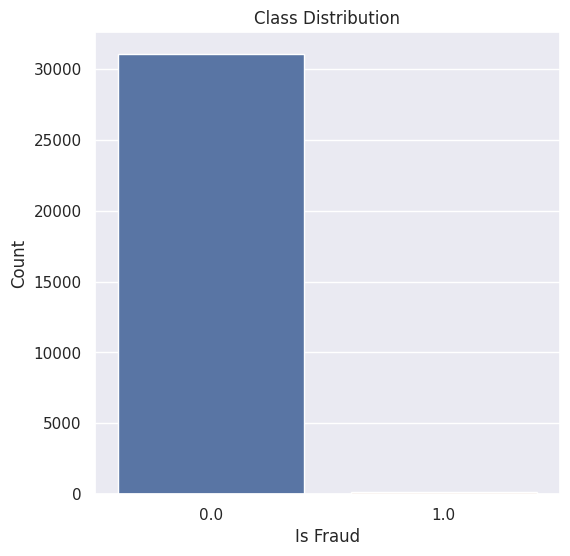

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

This graph gives us insight into the fact that the dataset is highly imbalanced.

<Axes: xlabel='gender', ylabel='count'>

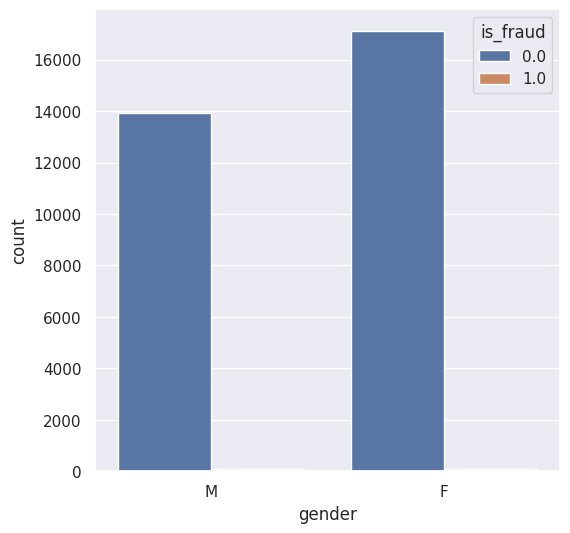

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'gender', hue = 'is_fraud', data = df)

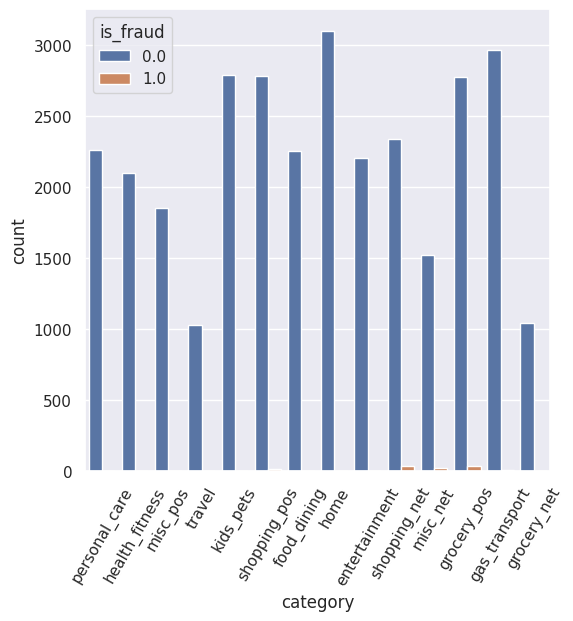

In [ ]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'category', hue = 'is_fraud', data = df)
plt.xticks(rotation = 60)
plt.show()

This graph gives us a preliminary idea regarding the causes for credit card frauds.

In [ ]:
plt.figure(figsize = (200, 200))
sns.countplot(x = 'job', hue = 'is_fraud', data = df)
plt.xticks(rotation = 60)
plt.show()

This graph gives us a preliminary idea regarding which professional fields are targeted by credit card fraud causing elements.

Data Pre-processing is being performed.

In [ ]:
X = df.drop(['is_fraud'], axis = 1)
Y = df['is_fraud']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [ ]:
Y = df[['is_fraud']].values

In [ ]:
print(' Shape of Independent Features  : ' , X.shape)
print(' Shape of Dependent Features    : ',Y.shape)

 Shape of Independent Features  :  (31175, 22)
 Shape of Dependent Features    :  (31175, 1)


In [ ]:
df['is_fraud'].value_counts()

0.0    31028
1.0      147
Name: is_fraud, dtype: int64

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in a dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
x,y= smote.fit_resample(X,Y)

In [ ]:
print('Data   : ', x.shape)
print('Labels : ', y.shape)

Data   :  (62056, 22)
Labels :  (62056,)


The training of the data is being performed to receive accurate predictions.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

From here on out, several classification models are being used to find out which algorithm gives the highest accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg= LogisticRegression()

In [ ]:
LogReg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_Log= LogReg.predict(x_test)

In [ ]:


from sklearn.metrics import accuracy_score

In [ ]:

pred_test  = LogReg.predict(x_test)


print('  Accuracy via Logistic Regression : ', accuracy_score(y_test, pred_Log))

  Accuracy via Logistic Regression :  0.49803942633077297


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dct.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_dct=dct.predict(x_test)
print('Accuracy via Decision Tree Classifier : ', accuracy_score(y_test, pred_test))

Accuracy via Decision Tree Classifier :  0.49803942633077297


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators = 20)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_xg=xg.predict(x_test)
print('Accuracy via XGBOOST Classifier: ', accuracy_score(y_test,pred_xg))

Accuracy via XGBOOST Classifier:  0.9972068539506902


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 2)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

In [ ]:
pred_rf=rf.predict(x_test)
print('Accuracy via Random Forest Classifier: ',accuracy_score(y_test,pred_rf))

Accuracy via Random Forest Classifier:  0.9997851426115916


From the above results, we can observe that in this particular case, the Random Forest Classifier is providing the highest accuracy.